# Dados SNIS 2019

In [1]:
import numpy as np
import pandas as pd

In [2]:
def load_and_clean(nome_arquivo):
    df = pd.read_csv(nome_arquivo, sep=";")
    
    # As colunas ficaram movidas, entao iremos fazer drop na ultima coluna e renomear todas as colunas
    new_columns = list(df.columns)[1:]
    
    df = df.drop([
        'TB012 - Quantidade de empregados administrativos dos agentes privados (Antigo campo GE051)'],
        axis=1)
    
    df.columns = new_columns 
    
    # há muitas colunas com values 0 e '0', vamos substituir por nan
    df = df.replace(0, np.nan)
    df = df.replace("0", np.nan)
    df = df.replace("0,00", np.nan)
    return df

In [3]:
df = load_and_clean('novo2.csv')

In [4]:
df.head()

,Código do Município,Município,Estado,Ano de Referência,Prestadores,Serviços,Natureza Jurídica,FN001 - Receita operacional direta total,FN002 - Receita operacional direta de água,FN003 - Receita operacional direta de esgoto,...,QD009 - Quantidade de amostras para turbidez fora do padrão,QD011 - Quantidades de extravasamentos de esgotos registrados,QD012 - Duração dos extravasamentos registrados,QD021 - Quantidade de interrupções sistemáticas,QD022 - Duração das interrupções sistemáticas,QD023 - Quantidade de reclamações ou solicitações de serviços,QD024 - Quantidade de serviços executados,QD025 - Tempo total de execução dos serviços,TB011 - Quantidade de empregados administrativos dos agentes públicos (Antigo campo GE050),TB012 - Quantidade de empregados administrativos dos agentes privados (Antigo campo GE051)
1200013,120001,Acrelândia,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água,Autarquia,"663.546,06","663.546,06",NaN,...,112.0,NaN,NaN,365.0,"3.650,00",568,464,"6.336,00",NaN,NaN
1200054,120005,Assis Brasil,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"723.713,71","723.713,71",NaN,...,NaN,NaN,NaN,12.0,"730,00",515,491,"6.336,00",4.0,NaN
1200104,120010,Brasiléia,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"1.984.882,66","1.984.882,66",NaN,...,NaN,NaN,NaN,365.0,"2.190,00",1.059,1.001,"14.784,00",3.0,NaN
1200138,120013,Bujari,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"647.261,88","647.261,88",NaN,...,109.0,NaN,NaN,365.0,"4.380,00",177,155,"6.336,00",2.0,NaN
1200179,120017,Capixaba,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"602.726,79","602.726,79",NaN,...,55.0,NaN,NaN,12.0,"5.110,00",235,216,"4.224,00",1.0,NaN


In [5]:
df_population = pd.read_excel(
    'estimativa_dou_2019.xls', dtype='str', skiprows=1).drop([
    'COD. UF', 'COD. MUNIC'], axis=1).rename(columns={'NOME DO MUNICÍPIO' : 'Município', 'UF': 'Estado'})
df_population.head()

,Estado,Município,POPULAÇÃO ESTIMADA
0,RO,Alta Floresta D'Oeste,22945
1,RO,Ariquemes,107863
2,RO,Cabixi,5312
3,RO,Cacoal,85359
4,RO,Cerejeiras,16323


# Merge no df SNIS com o df de populacao

In [6]:
df_SNIS_pop = df.merge(df_population, how='left', on=['Município', 'Estado'])
df_SNIS_pop.head()

,Código do Município,Município,Estado,Ano de Referência,Prestadores,Serviços,Natureza Jurídica,FN001 - Receita operacional direta total,FN002 - Receita operacional direta de água,FN003 - Receita operacional direta de esgoto,...,QD011 - Quantidades de extravasamentos de esgotos registrados,QD012 - Duração dos extravasamentos registrados,QD021 - Quantidade de interrupções sistemáticas,QD022 - Duração das interrupções sistemáticas,QD023 - Quantidade de reclamações ou solicitações de serviços,QD024 - Quantidade de serviços executados,QD025 - Tempo total de execução dos serviços,TB011 - Quantidade de empregados administrativos dos agentes públicos (Antigo campo GE050),TB012 - Quantidade de empregados administrativos dos agentes privados (Antigo campo GE051),POPULAÇÃO ESTIMADA
0,120001,Acrelândia,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água,Autarquia,"663.546,06","663.546,06",NaN,...,NaN,NaN,365.0,"3.650,00",568,464,"6.336,00",NaN,NaN,15256
1,120005,Assis Brasil,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"723.713,71","723.713,71",NaN,...,NaN,NaN,12.0,"730,00",515,491,"6.336,00",4.0,NaN,7417
2,120010,Brasiléia,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"1.984.882,66","1.984.882,66",NaN,...,NaN,NaN,365.0,"2.190,00",1.059,1.001,"14.784,00",3.0,NaN,26278
3,120013,Bujari,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"647.261,88","647.261,88",NaN,...,NaN,NaN,365.0,"4.380,00",177,155,"6.336,00",2.0,NaN,10266
4,120017,Capixaba,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"602.726,79","602.726,79",NaN,...,NaN,NaN,12.0,"5.110,00",235,216,"4.224,00",1.0,NaN,11733


vamos descartar as colunas que possuem mais de 5000 nan

In [7]:
df_SNIS_pop = df_SNIS_pop.loc[:, (df_SNIS_pop.isnull().sum(axis=0)) < 5000]
df_SNIS_pop.head()

,Código do Município,Município,Estado,Ano de Referência,Prestadores,Serviços,Natureza Jurídica,FN001 - Receita operacional direta total,FN002 - Receita operacional direta de água,FN003 - Receita operacional direta de esgoto,...,QD011 - Quantidades de extravasamentos de esgotos registrados,QD012 - Duração dos extravasamentos registrados,QD021 - Quantidade de interrupções sistemáticas,QD022 - Duração das interrupções sistemáticas,QD023 - Quantidade de reclamações ou solicitações de serviços,QD024 - Quantidade de serviços executados,QD025 - Tempo total de execução dos serviços,TB011 - Quantidade de empregados administrativos dos agentes públicos (Antigo campo GE050),TB012 - Quantidade de empregados administrativos dos agentes privados (Antigo campo GE051),POPULAÇÃO ESTIMADA
0,120001,Acrelândia,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água,Autarquia,"663.546,06","663.546,06",NaN,...,NaN,NaN,365.0,"3.650,00",568,464,"6.336,00",NaN,NaN,15256
1,120005,Assis Brasil,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"723.713,71","723.713,71",NaN,...,NaN,NaN,12.0,"730,00",515,491,"6.336,00",4.0,NaN,7417
2,120010,Brasiléia,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"1.984.882,66","1.984.882,66",NaN,...,NaN,NaN,365.0,"2.190,00",1.059,1.001,"14.784,00",3.0,NaN,26278
3,120013,Bujari,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"647.261,88","647.261,88",NaN,...,NaN,NaN,365.0,"4.380,00",177,155,"6.336,00",2.0,NaN,10266
4,120017,Capixaba,AC,2019,[12004000] Departamento Estadual de Pavimentaç...,Água | Res. Sólidos,Autarquia | Administração pública direta,"602.726,79","602.726,79",NaN,...,NaN,NaN,12.0,"5.110,00",235,216,"4.224,00",1.0,NaN,11733


In [8]:
# vamos descartar as rows com mais de 30 nan e a coluna "codigo do municipio"
df_SNIS_pop = df_SNIS_pop.dropna(thresh=30).drop(['Código do Município', 'Ano de Referência'], axis=1)
df_SNIS_pop.head()

,Município,Estado,Prestadores,Serviços,Natureza Jurídica,FN001 - Receita operacional direta total,FN002 - Receita operacional direta de água,FN003 - Receita operacional direta de esgoto,FN004 - Receita operacional indireta,FN005 - Receita operacional total (direta + indireta),...,QD011 - Quantidades de extravasamentos de esgotos registrados,QD012 - Duração dos extravasamentos registrados,QD021 - Quantidade de interrupções sistemáticas,QD022 - Duração das interrupções sistemáticas,QD023 - Quantidade de reclamações ou solicitações de serviços,QD024 - Quantidade de serviços executados,QD025 - Tempo total de execução dos serviços,TB011 - Quantidade de empregados administrativos dos agentes públicos (Antigo campo GE050),TB012 - Quantidade de empregados administrativos dos agentes privados (Antigo campo GE051),POPULAÇÃO ESTIMADA
15,Rio Branco,AC,[12004000] Departamento Estadual de Pavimentaç...,Água e Esgoto | Res. Sólidos,Autarquia | Administração pública direta,"47.213.039,47","38.247.595,47","8.965.444,00","421.632,30","47.634.671,77",...,NaN,NaN,2.3,"38.790,00",15.364,11.688,"54.912,00",12.0,22.0,407319
23,Anadia,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água,Sociedade de economia mista com administração ...,"1.646.496,24","1.646.496,24",NaN,"99.912,05","1.746.408,29",...,NaN,NaN,8.0,"88,00",2.715,2.663,"800,00",NaN,NaN,17545
24,Arapiraca,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...,"52.839.484,70","52.309.070,31","530.414,39","4.158.027,15","56.997.511,85",...,158.0,"7.584,00",NaN,NaN,7.504,6.099,"292.752,00",5.0,5.0,231747
27,Barra de São Miguel,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...,"5.106.808,70","4.986.971,89","119.836,81","380.497,77","5.487.306,47",...,NaN,NaN,NaN,NaN,1.368,1.285,"1.501,76",1.0,NaN,8322
28,Batalha,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...,"3.175.641,43","2.102.583,93","1.073.057,50","240.809,34","3.416.450,77",...,14.0,"1.022,00",121.0,"1.937,00",1.080,1.080,"28.080,00",3.0,NaN,18232


In [9]:
df_SNIS_pop = df_SNIS_pop.dropna(subset=['POPULAÇÃO ESTIMADA'])

Exportamos os dados operacionais para um csv

df_SNIS_pop[['Município', 'Estado', 'Prestadores', 'Serviços', 
          'Natureza Jurídica', 
          'QD011 - Quantidades de extravasamentos de esgotos registrados',
         'QD012 - Duração dos extravasamentos registrados', 
          'QD021 - Quantidade de interrupções sistemáticas',
         'QD022 - Duração das interrupções sistemáticas', 
          'QD023 - Quantidade de reclamações ou solicitações de serviços',
         'QD024 - Quantidade de serviços executados', 
          'QD025 - Tempo total de execução dos serviços', 
          'POPULAÇÃO ESTIMADA']].to_csv('df_operacional.csv')

In [10]:
# removemos os espacos brancos final do texto dos nomes das colunas
df_SNIS_pop.columns = df_SNIS_pop.columns.str.replace('^ +| +$', '_')
df_SNIS_pop.columns[:5]

<ipython-input-10-01749325bb1d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_SNIS_pop.columns = df_SNIS_pop.columns.str.replace('^ +| +$', '_')


Index(['Município', 'Estado', 'Prestadores', 'Serviços', 'Natureza Jurídica'], dtype='object')

# Convertemos os dados de string to numeric

In [11]:
# vamos converter todas as colunas em string
df_SNIS_pop = df_SNIS_pop.astype(str)

In [12]:
# primeiramente subsituimos os pontos por brancos
def col_to_numeric(column):
    df_SNIS_pop[column] = df_SNIS_pop[column].str.replace('.', '', regex=False)
    df_SNIS_pop[column] = df_SNIS_pop[column].str.replace(',', '.', regex=False).astype(float)
    return df_SNIS_pop[column]
    
# df_SNIS_pop['FN001 - Receita operacional direta total'] = df_SNIS_pop[
#     'FN001 - Receita operacional direta total'].str.replace('.', '', regex=False)

In [13]:
# colunas para aplicar a transformacao
# list(df_SNIS_pop.columns[5:25])
# list(df_SNIS_pop.columns[26:34])
# list(df_SNIS_pop.columns[35:36])
# list(df_SNIS_pop.columns[37:41])

In [14]:
# aplicamos a transformacao
try:
    for col in list(df_SNIS_pop.columns[5:25]):
        col_to_numeric(col)

    for col in list(df_SNIS_pop.columns[26:34]):
        col_to_numeric(col)

    for col in list(df_SNIS_pop.columns[35:36]):
        col_to_numeric(col)

    for col in list(df_SNIS_pop.columns[37:41]):
        col_to_numeric(col)
        
except:
    pass

In [15]:
df_SNIS_pop.head()

,Município,Estado,Prestadores,Serviços,Natureza Jurídica,FN001 - Receita operacional direta total,FN002 - Receita operacional direta de água,FN003 - Receita operacional direta de esgoto,FN004 - Receita operacional indireta,FN005 - Receita operacional total (direta + indireta),...,QD011 - Quantidades de extravasamentos de esgotos registrados,QD012 - Duração dos extravasamentos registrados,QD021 - Quantidade de interrupções sistemáticas,QD022 - Duração das interrupções sistemáticas,QD023 - Quantidade de reclamações ou solicitações de serviços,QD024 - Quantidade de serviços executados,QD025 - Tempo total de execução dos serviços,TB011 - Quantidade de empregados administrativos dos agentes públicos (Antigo campo GE050),TB012 - Quantidade de empregados administrativos dos agentes privados (Antigo campo GE051),POPULAÇÃO ESTIMADA
15,Rio Branco,AC,[12004000] Departamento Estadual de Pavimentaç...,Água e Esgoto | Res. Sólidos,Autarquia | Administração pública direta,47213039.47,38247595.47,8965444.00,421632.30,47634671.77,...,nan,NaN,2.3,38790.0,15364.0,11688.0,54912.00,12.0,22.0,407319
23,Anadia,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água,Sociedade de economia mista com administração ...,1646496.24,1646496.24,NaN,99912.05,1746408.29,...,nan,NaN,8.0,88.0,2715.0,2663.0,800.00,nan,nan,17545
24,Arapiraca,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...,52839484.70,52309070.31,530414.39,4158027.15,56997511.85,...,158.0,7584.0,nan,NaN,7504.0,6099.0,292752.00,5.0,5.0,231747
27,Barra de São Miguel,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...,5106808.70,4986971.89,119836.81,380497.77,5487306.47,...,nan,NaN,nan,NaN,1368.0,1285.0,1501.76,1.0,nan,8322
28,Batalha,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...,3175641.43,2102583.93,1073057.50,240809.34,3416450.77,...,14.0,1022.0,121.0,1937.0,1080.0,1080.0,28080.00,3.0,nan,18232


In [16]:
# colunas numericas em formato americano to float

american_numeric_cols = ['FN026 - Quantidade total de empregados próprios',
                'QD011 - Quantidades de extravasamentos de esgotos registrados',
                'QD021 - Quantidade de interrupções sistemáticas',
                'TB011 - Quantidade de empregados administrativos dos agentes públicos (Antigo campo GE050)',
                'TB012 - Quantidade de empregados administrativos dos agentes privados (Antigo campo GE051)',
]

def amer_col_to_numeric(column):
#     df_SNIS_pop[column] = pd.to_numeric(df_SNIS_pop[column], downcast="float")
    df_SNIS_pop[column] = df_SNIS_pop[column].astype(float)
    return df_SNIS_pop[column]

In [17]:
try:
    for col2 in american_numeric_cols:
        amer_col_to_numeric(col2) 
except:
    pass

df['text_new'] = df['text'].str.split('::').str[0]

In [18]:
# a coluna 'POPULAÇÃO ESTIMADA' possui caracteres diferentes tais como 35248 (2), entao iremos 
# remover o (2) e converter a float
df_SNIS_pop['POPULAÇÃO ESTIMADA'] = df_SNIS_pop['POPULAÇÃO ESTIMADA'].str.split(' ').str[0].astype(float)

agora temos todas as colunas em formatacao numerica: float

# Separacao da coluna natureza juridica em mais colunas

df[['V','allele']] = df['V'].str.split('-',expand=True)

In [19]:
def discover_naturezas():
    
    naturezas = []
    for nat in df_SNIS_pop['Natureza Jurídica'].unique():
        for na in nat.split(' | '):
            if na not in naturezas:
                naturezas.append(na)
                
    return naturezas

In [20]:
naturezas_unique = discover_naturezas()

In [21]:
# agora iremos criar novas colunas com as naturezas juridicas
def create_naturezas(natureza_jur):
    nat_bin = []
    for natureza in df_SNIS_pop['Natureza Jurídica']:
        if natureza_jur in natureza:
            nat_bin.append(1)
        else:
            nat_bin.append(0)
    df_SNIS_pop[natureza_jur] = nat_bin
    return df_SNIS_pop[natureza_jur]

In [22]:
for nat3 in naturezas_unique:
    create_naturezas(nat3)

In [23]:
df_SNIS_pop.head()

,Município,Estado,Prestadores,Serviços,Natureza Jurídica,FN001 - Receita operacional direta total,FN002 - Receita operacional direta de água,FN003 - Receita operacional direta de esgoto,FN004 - Receita operacional indireta,FN005 - Receita operacional total (direta + indireta),...,QD025 - Tempo total de execução dos serviços,TB011 - Quantidade de empregados administrativos dos agentes públicos (Antigo campo GE050),TB012 - Quantidade de empregados administrativos dos agentes privados (Antigo campo GE051),POPULAÇÃO ESTIMADA,Autarquia,Administração pública direta,Sociedade de economia mista com administração pública,Empresa privada,Empresa pública,Organização social
15,Rio Branco,AC,[12004000] Departamento Estadual de Pavimentaç...,Água e Esgoto | Res. Sólidos,Autarquia | Administração pública direta,47213039.47,38247595.47,8965444.00,421632.30,47634671.77,...,54912.00,12.0,22.0,407319.0,1,1,0,0,0,0
23,Anadia,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água,Sociedade de economia mista com administração ...,1646496.24,1646496.24,NaN,99912.05,1746408.29,...,800.00,NaN,NaN,17545.0,0,0,1,0,0,0
24,Arapiraca,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...,52839484.70,52309070.31,530414.39,4158027.15,56997511.85,...,292752.00,5.0,5.0,231747.0,0,1,1,0,0,0
27,Barra de São Miguel,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...,5106808.70,4986971.89,119836.81,380497.77,5487306.47,...,1501.76,1.0,NaN,8322.0,0,1,1,0,0,0
28,Batalha,AL,[27043000] Companhia de Saneamento de Alagoas ...,Água e Esgoto | Res. Sólidos,Sociedade de economia mista com administração ...,3175641.43,2102583.93,1073057.50,240809.34,3416450.77,...,28080.00,3.0,NaN,18232.0,0,1,1,0,0,0


In [24]:
df_normalizado = df_SNIS_pop[['Município', 'Estado', 'Prestadores', 'Natureza Jurídica',
                             'Autarquia', 'Administração pública direta',
                             'Sociedade de economia mista com administração pública',
                             'Empresa privada', 'Empresa pública', 'Organização social',
                             'POPULAÇÃO ESTIMADA']]

In [25]:
df_normalizado['Reclamacoes a cada 1000 habitantes'] = (df_SNIS_pop[
    'QD023 - Quantidade de reclamações ou solicitações de serviços']/df_SNIS_pop[
    'POPULAÇÃO ESTIMADA'])*1000
                                                                                 

<ipython-input-25-32ba813e7e9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado['Reclamacoes a cada 1000 habitantes'] = (df_SNIS_pop[


In [26]:
# Municipios com maior numero de reclamacoes
df_normalizado.sort_values(by=['Reclamacoes a cada 1000 habitantes'], ascending=False).head(2)

,Município,Estado,Prestadores,Natureza Jurídica,Autarquia,Administração pública direta,Sociedade de economia mista com administração pública,Empresa privada,Empresa pública,Organização social,POPULAÇÃO ESTIMADA,Reclamacoes a cada 1000 habitantes
2652,Itatuba,PB,[25075000] Companhia de Águas e Esgotos da Par...,Administração pública direta | Sociedade de ec...,0,1,1,0,0,0,10962.0,20059.478197
2624,Coxixola,PB,[25075000] Companhia de Águas e Esgotos da Par...,Sociedade de economia mista com administração ...,0,1,1,0,0,0,1921.0,10619.989589


In [27]:
df_normalizado.sort_values(by=[
    'Reclamacoes a cada 1000 habitantes'], ascending=False).head(2)['Prestadores'].iloc[0]

'[25075000] Companhia de Águas e Esgotos da Paraíba - CAGEPA | [25072011] Prefeitura Municipal de Itatuba - PMI | [25072040] Prefeitura Municipal de Itatuba - PMI'

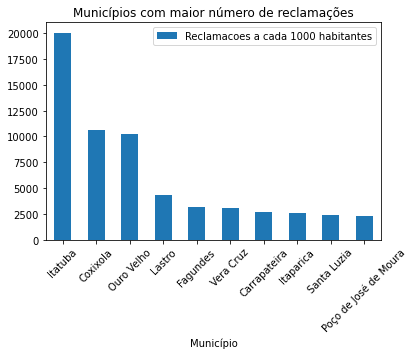

In [28]:
ax = df_normalizado.sort_values(by=[
    'Reclamacoes a cada 1000 habitantes'], ascending=False).head(10).plot.bar(
    x='Município', y='Reclamacoes a cada 1000 habitantes', rot=45,
    title="Municípios com maior número de reclamações")

In [29]:
df_normalizado2 = df_normalizado.dropna(subset=['Reclamacoes a cada 1000 habitantes'])

In [30]:
def create_dict_reclamacoes_natureza():
    recl_nat = {}
    for nat3 in naturezas_unique:
        recl_nat[nat3] = df_normalizado2[
            df_normalizado2[nat3] == 1][
            'Reclamacoes a cada 1000 habitantes'].mean()
    return recl_nat
        
recl_nat = create_dict_reclamacoes_natureza()

In [31]:
recl_nat_pd = pd.Series(recl_nat)
recl_nat_pd.sort_values(ascending=False)
# ax2 = recl_nat_pd.sort_values(ascending=False).plot.bar(
#     x='index', y='Reclamacoes a cada 1000 habitantes', rot=45,
#     title="Municípios com maior número de reclamações")

Empresa privada                                          535.596558
Organização social                                       396.855865
Administração pública direta                             278.932423
Sociedade de economia mista com administração pública    277.979150
Empresa pública                                          225.930170
Autarquia                                                190.696682
dtype: float64

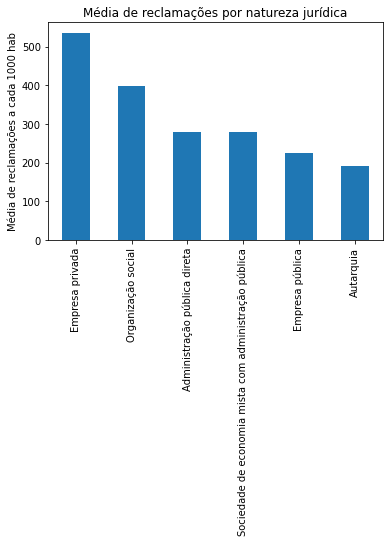

In [99]:
import matplotlib.pyplot as plt
recl_nat_pd.sort_values(ascending=False).plot(kind='bar')
plt.title('Média de reclamações por natureza jurídica')
plt.ylabel('Média de reclamações a cada 1000 hab')
plt.xticks(rotation=90);

# Média de reclamações por cada uma das empresas

In [33]:
maiores_empresas = ['sabesp', 'cedae', 'copasa', 'sanepar', 'corsan', 'embasa',
                   'compesa', 'saneago', 'caesb', 'cagece', 'brk']

In [34]:
def create_empresas(empresa):
    empresas_bin = []
    for empresas in df_SNIS_pop['Prestadores']:
        if empresa in empresas.lower():
            empresas_bin.append(1)
        else:
            empresas_bin.append(0)
    df_SNIS_pop[empresa] = empresas_bin
    return df_SNIS_pop[empresa]

In [35]:
for emp in maiores_empresas:
    create_empresas(emp)

In [36]:
def normalizar_empresas():
    df_normalizado_empresas = df_SNIS_pop[['Município', 'Estado', 'Prestadores', 'Natureza Jurídica',
                                             'Autarquia', 'Administração pública direta',
                                             'Sociedade de economia mista com administração pública',
                                             'Empresa privada', 'Empresa pública', 'Organização social',
                                             'POPULAÇÃO ESTIMADA', 'sabesp', 'cedae', 'copasa', 'sanepar',
                                              'corsan', 'embasa', 'compesa', 'saneago', 'caesb', 'cagece', 
                                              'brk']]

    df_normalizado_empresas['Reclamacoes a cada 1000 habitantes'] = df_normalizado2[
        'Reclamacoes a cada 1000 habitantes']

    df_normalizado_empresas = df_normalizado_empresas.dropna(subset=['Reclamacoes a cada 1000 habitantes'])
    return df_normalizado_empresas

df_normalizado_empresas = normalizar_empresas()

<ipython-input-36-f89b6dc59836>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado_empresas['Reclamacoes a cada 1000 habitantes'] = df_normalizado2[


In [37]:
def create_dict_reclamacoes_empresas():
    recl_empresas = {}
    for emp in maiores_empresas:
        recl_empresas[emp] = df_normalizado_empresas[df_normalizado_empresas[emp] == 1][
            'Reclamacoes a cada 1000 habitantes'].mean()
        
    recl_empresas_pd = pd.Series(recl_empresas)
    
    return recl_empresas_pd.sort_values(ascending=False)
        
recl_empresas_pd = create_dict_reclamacoes_empresas()

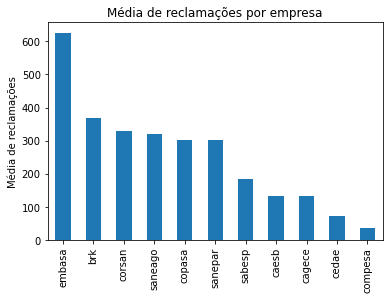

In [38]:
recl_empresas_pd.sort_values(ascending=False).plot(kind='bar')
plt.title('Média de reclamações por empresa')
plt.ylabel('Média de reclamações')
plt.xticks(rotation=90);

# Media de reclamações por estado

In [39]:
df_SNIS_pop['Estado'].unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [40]:
# faremos groupby 'Estado' e iremos obter a media de reclamacoes por estado

df_normalizado_empresas.groupby('Estado').mean()[
    'Reclamacoes a cada 1000 habitantes'].sort_values(ascending=False)[:10]

Estado
PB    622.154792
BA    597.362562
TO    492.799290
MS    492.012758
MT    377.900252
GO    316.525271
RS    315.074850
PR    289.629322
MG    282.908528
SP    211.525642
Name: Reclamacoes a cada 1000 habitantes, dtype: float64

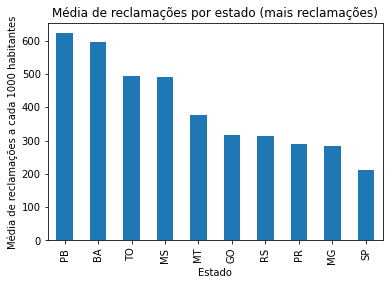

In [41]:
df_normalizado_empresas.groupby('Estado').mean()[
    'Reclamacoes a cada 1000 habitantes'].sort_values(
    ascending=False)[:10].plot(kind='bar')
plt.title('Média de reclamações por estado (mais reclamações)')
plt.ylabel('Média de reclamações a cada 1000 habitantes')
plt.xticks(rotation=90);

<ipython-input-42-f4b8c9160092>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


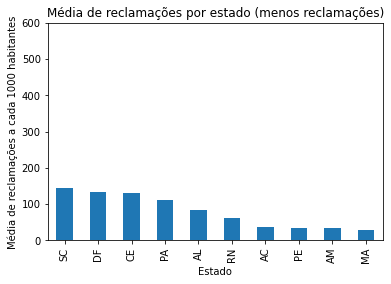

In [42]:
df_normalizado_empresas.groupby('Estado').mean()[
    'Reclamacoes a cada 1000 habitantes'].sort_values(
    ascending=False)[-12:-2].plot(kind='bar')
plt.title('Média de reclamações por estado (menos reclamações)')
plt.ylabel('Média de reclamações a cada 1000 habitantes')
axes = plt.axes()
axes.set_ylim([0, 600])
plt.xticks(rotation=90);

# Quantidades de extravasamentos de esgotos registrados

# Por estado

In [43]:
df_normalizado_empresas['Extravasamentos de esgotos registrados a cada 1000 habitantes'] = (df_SNIS_pop[
    'QD011 - Quantidades de extravasamentos de esgotos registrados']/df_SNIS_pop[
    'POPULAÇÃO ESTIMADA'])*1000

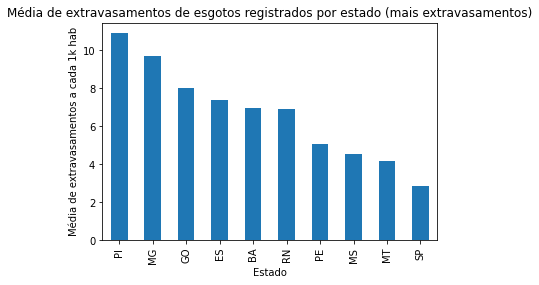

In [44]:
df_normalizado_empresas.groupby('Estado').mean()[
    'Extravasamentos de esgotos registrados a cada 1000 habitantes'].sort_values(
    ascending=False)[:10].plot(kind='bar')

plt.title('Média de extravasamentos de esgotos registrados por estado (mais extravasamentos)')
plt.ylabel('Média de extravasamentos a cada 1k hab')
plt.xticks(rotation=90);

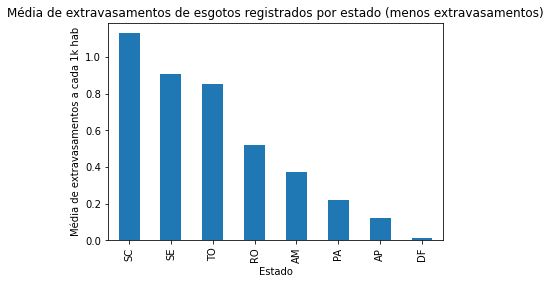

In [45]:
df_normalizado_empresas.groupby('Estado').mean()[
    'Extravasamentos de esgotos registrados a cada 1000 habitantes'].sort_values(
    ascending=False)[-10:-2].plot(kind='bar')

plt.title('Média de extravasamentos de esgotos registrados por estado (menos extravasamentos)')
plt.ylabel('Média de extravasamentos a cada 1k hab')
plt.xticks(rotation=90);

# Natureza juridica

In [46]:
def create_series_extravasamentos_natureza():
    extrav_nat = {}
    for nat3 in naturezas_unique:
        extrav_nat[nat3] = df_normalizado_empresas[
            df_normalizado2[nat3] == 1][
            'Extravasamentos de esgotos registrados a cada 1000 habitantes'].mean()
        
    extrav_nat_pd = pd.Series(extrav_nat)
    extrav_nat_pd.sort_values(ascending=False)
    
    return extrav_nat_pd
        
extrav_nat_pd = create_series_extravasamentos_natureza()

# ax2 = recl_nat_pd.sort_values(ascending=False).plot.bar(
#     x='index', y='Reclamacoes a cada 1000 habitantes', rot=45,
#     title="Municípios com maior número de reclamações")
extrav_nat_pd

Autarquia                                                4.699073
Administração pública direta                             5.707928
Sociedade de economia mista com administração pública    5.946059
Empresa privada                                          3.686006
Empresa pública                                          8.608552
Organização social                                            NaN
dtype: float64

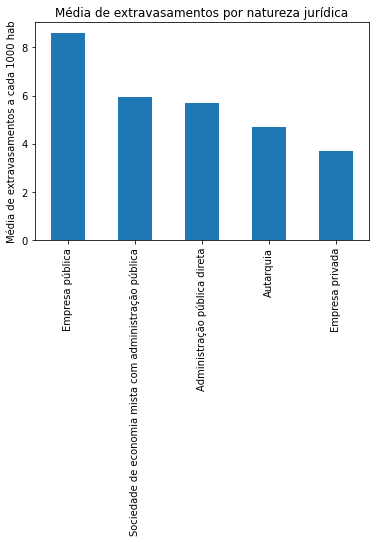

In [47]:
extrav_nat_pd.sort_values(ascending=False)[:-1].plot(kind='bar')
plt.title('Média de extravasamentos por natureza jurídica')
plt.ylabel('Média de extravasamentos a cada 1000 hab')
plt.xticks(rotation=90);

# Empresas

In [48]:
def create_series_reclamacoes_empresas():
    extrav_empresas = {}
    for emp in maiores_empresas:
        extrav_empresas[emp] = df_normalizado_empresas[df_normalizado_empresas[emp] == 1][
            'Extravasamentos de esgotos registrados a cada 1000 habitantes'].mean()
        
    extrav_empresas_pd = pd.Series(extrav_empresas)
    
    return extrav_empresas_pd.sort_values(ascending=False)
        
extrav_empresas_pd = create_series_reclamacoes_empresas()

In [49]:
extrav_empresas_pd

copasa     10.198533
embasa      9.794579
saneago     8.488900
compesa     5.078048
cagece      2.822177
sabesp      1.824398
cedae       1.489847
brk         1.343662
corsan      1.294161
sanepar     0.288569
caesb       0.014103
dtype: float64

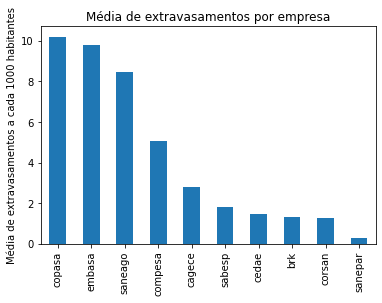

In [50]:
extrav_empresas_pd[:-1].plot(kind='bar')
plt.title('Média de extravasamentos por empresa')
plt.ylabel('Média de extravasamentos a cada 1000 habitantes')
plt.xticks(rotation=90);

# Quantidade de interrupções sistemáticas

# Estado

In [51]:
df_normalizado_empresas['Quantidade de interrupções sistemáticas a cada 1000 habitantes'] = (df_SNIS_pop[
    'QD021 - Quantidade de interrupções sistemáticas']/df_SNIS_pop[
    'POPULAÇÃO ESTIMADA'])*1000

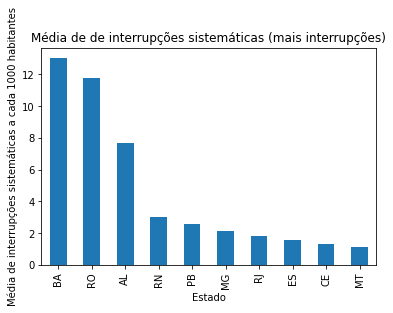

In [52]:
df_normalizado_empresas.groupby('Estado').mean()[
    'Quantidade de interrupções sistemáticas a cada 1000 habitantes'].sort_values(
    ascending=False)[:10].plot(kind='bar')

plt.title('Média de de interrupções sistemáticas (mais interrupções)')
plt.ylabel('Média de interrupções sistemáticas a cada 1000 habitantes')
plt.xticks(rotation=90);

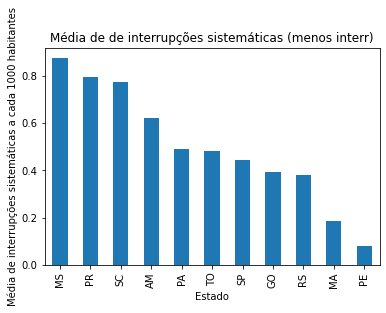

In [53]:
df_normalizado_empresas.groupby('Estado').mean()[
    'Quantidade de interrupções sistemáticas a cada 1000 habitantes'].sort_values(
    ascending=False)[-15:-4].plot(kind='bar')

plt.title('Média de de interrupções sistemáticas (menos interr)')
plt.ylabel('Média de interrupções sistemáticas a cada 1000 habitantes')
plt.xticks(rotation=90);

# Natureza jurídica 

In [54]:
def create_series_interrupcoes_natureza():
    interr_nat = {}
    for nat3 in naturezas_unique:
        interr_nat[nat3] = df_normalizado_empresas[
            df_normalizado_empresas[nat3] == 1][
            'Quantidade de interrupções sistemáticas a cada 1000 habitantes'].mean()
        
    interr_nat_pd = pd.Series(interr_nat)
    interr_nat_pd.sort_values(ascending=False)
    
    return interr_nat_pd
        
interr_nat_pd = create_series_interrupcoes_natureza()

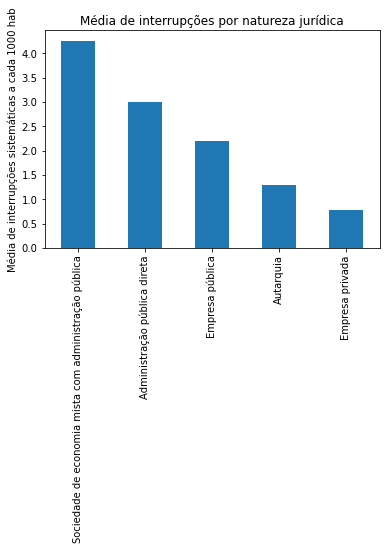

In [55]:
interr_nat_pd.sort_values(ascending=False)[:-1].plot(kind='bar')
plt.title('Média de interrupções por natureza jurídica')
plt.ylabel('Média de interrupções sistemáticas a cada 1000 hab')
plt.xticks(rotation=90);

# Empresas

In [56]:
def create_series_interrupcoes_empresas():
    interr_empresas = {}
    for emp in maiores_empresas:
        interr_empresas[emp] = df_normalizado_empresas[df_normalizado_empresas[emp] == 1][
            'Quantidade de interrupções sistemáticas a cada 1000 habitantes'].mean()
        
    interr_empresas_pd = pd.Series(interr_empresas)
    
    return interr_empresas_pd.sort_values(ascending=False)
        
interr_empresas_pd = create_series_interrupcoes_empresas()

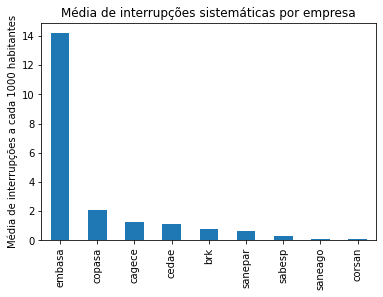

In [57]:
interr_empresas_pd[:-2].plot(kind='bar')
plt.title('Média de interrupções sistemáticas por empresa')
plt.ylabel('Média de interrupções a cada 1000 habitantes')
plt.xticks(rotation=90);

# Quantidade de serviços executados

In [58]:
df_normalizado_empresas['Quantidade de serviços executados a cada 1000 habitantes'] = (df_SNIS_pop[
    'QD024 - Quantidade de serviços executados']/df_SNIS_pop[
    'POPULAÇÃO ESTIMADA'])*1000

# Por estado

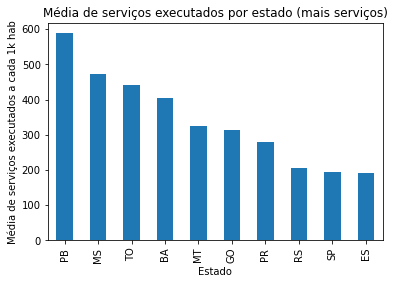

In [59]:
df_normalizado_empresas.groupby('Estado').mean()[
    'Quantidade de serviços executados a cada 1000 habitantes'].sort_values(
    ascending=False)[:10].plot(kind='bar')

plt.title('Média de serviços executados por estado (mais serviços)')
plt.ylabel('Média de serviços executados a cada 1k hab')
plt.xticks(rotation=90);

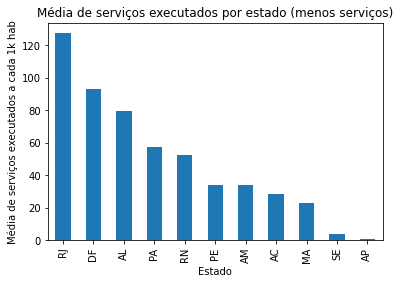

In [60]:
df_normalizado_empresas.groupby('Estado').mean()[
    'Quantidade de serviços executados a cada 1000 habitantes'].sort_values(
    ascending=False)[-11:].plot(kind='bar')

plt.title('Média de serviços executados por estado (menos serviços)')
plt.ylabel('Média de serviços executados a cada 1k hab')
plt.xticks(rotation=90);

# Natureza juridica

In [61]:
def create_series_servicos_natureza():
    serv_nat = {}
    for nat3 in naturezas_unique:
        serv_nat[nat3] = df_normalizado_empresas[
            df_normalizado_empresas[nat3] == 1][
            'Quantidade de serviços executados a cada 1000 habitantes'].mean()
        
    serv_nat_pd = pd.Series(serv_nat)    
    
    return serv_nat_pd.sort_values(ascending=False)
        
serv_nat_pd = create_series_extravasamentos_natureza()

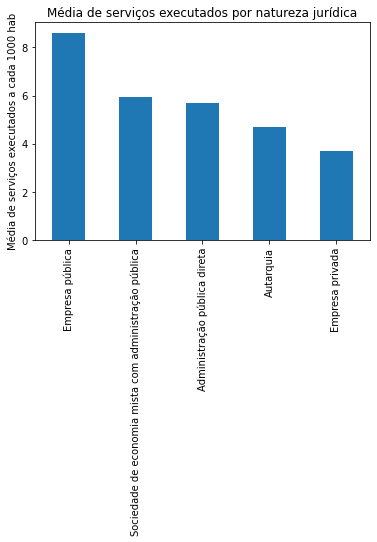

In [62]:
serv_nat_pd.sort_values(ascending=False)[:-1].plot(kind='bar')
plt.title('Média de serviços executados por natureza jurídica')
plt.ylabel('Média de serviços executados a cada 1000 hab')
plt.xticks(rotation=90);

# Empresas

In [63]:
def create_series_servicos_empresas():
    servicos_empresas = {}
    for emp in maiores_empresas:
        servicos_empresas[emp] = df_normalizado_empresas[df_normalizado_empresas[emp] == 1][
            'Quantidade de serviços executados a cada 1000 habitantes'].mean()
        
    servicos_empresas_pd = pd.Series(servicos_empresas)
    
    return servicos_empresas_pd.sort_values(ascending=False)
        
servicos_empresas_pd = create_series_reclamacoes_empresas()

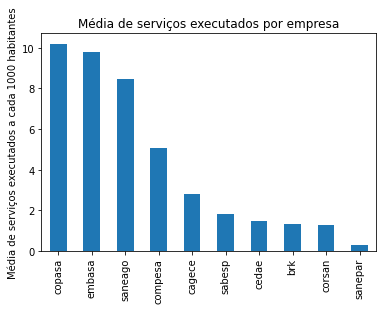

In [64]:
servicos_empresas_pd[:-1].plot(kind='bar')
plt.title('Média de serviços executados por empresa')
plt.ylabel('Média de serviços executados a cada 1000 habitantes')
plt.xticks(rotation=90);

# Desempenho operacional da BRK por municipio

In [65]:
brk = df_normalizado_empresas[df_normalizado_empresas['brk'] == 1]
brk = brk[['Município', 'Reclamacoes a cada 1000 habitantes', 
    'Extravasamentos de esgotos registrados a cada 1000 habitantes',
    'Quantidade de interrupções sistemáticas a cada 1000 habitantes',
    'Quantidade de serviços executados a cada 1000 habitantes']]

brk = brk.set_index('Município')

o dataframe brk possui apenas dados dos municipios nos quais a brk atua

In [66]:
brk.head()

,Reclamacoes a cada 1000 habitantes,Extravasamentos de esgotos registrados a cada 1000 habitantes,Quantidade de interrupções sistemáticas a cada 1000 habitantes,Quantidade de serviços executados a cada 1000 habitantes
Município,,,,
Cachoeiro de Itapemirim,104.411117,0.011973,NaN,58.802136
Paço do Lumiar,175.478940,5.916676,0.294606,142.458489
São José de Ribamar,253.862128,3.162865,0.163208,210.381176
Bom Jesus do Tocantins,224.780637,NaN,0.176668,175.784701
Redenção,358.474766,NaN,0.436388,193.178199


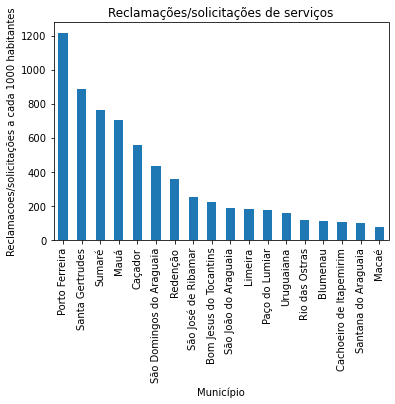

In [67]:
brk['Reclamacoes a cada 1000 habitantes'].sort_values(ascending=False).plot(kind='bar')
plt.title('Reclamações/solicitações de serviços')
plt.ylabel('Reclamacoes/solicitações a cada 1000 habitantes')
plt.xticks(rotation=90);

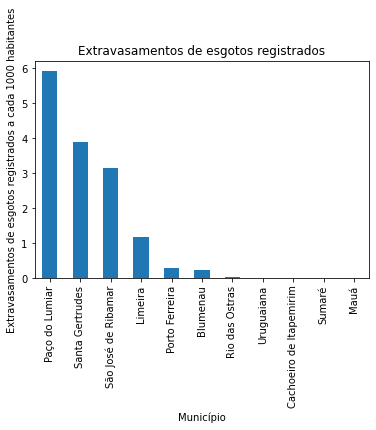

In [68]:
brk['Extravasamentos de esgotos registrados a cada 1000 habitantes'].dropna().sort_values(
    ascending=False).plot(kind='bar')
plt.title('Extravasamentos de esgotos registrados')
plt.ylabel('Extravasamentos de esgotos registrados a cada 1000 habitantes')
plt.xticks(rotation=90);

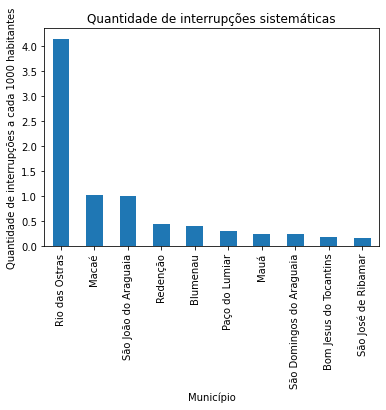

In [69]:
brk['Quantidade de interrupções sistemáticas a cada 1000 habitantes'].dropna().sort_values(
    ascending=False).plot(kind='bar')
plt.title('Quantidade de interrupções sistemáticas')
plt.ylabel('Quantidade de interrupções a cada 1000 habitantes')
plt.xticks(rotation=90);

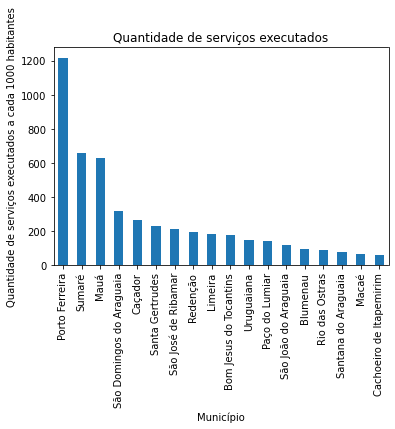

In [70]:
brk['Quantidade de serviços executados a cada 1000 habitantes'].dropna().sort_values(
    ascending=False).plot(kind='bar')
plt.title('Quantidade de serviços executados')
plt.ylabel('Quantidade de serviços executados a cada 1000 habitantes')
plt.xticks(rotation=90);

# Duração das interrupções

In [92]:
df_normalizado_empresas['Duração média das interrupções'] = (df_SNIS_pop[
    'QD022 - Duração das interrupções sistemáticas']/df_SNIS_pop[
    'QD021 - Quantidade de interrupções sistemáticas'])

# Por estado

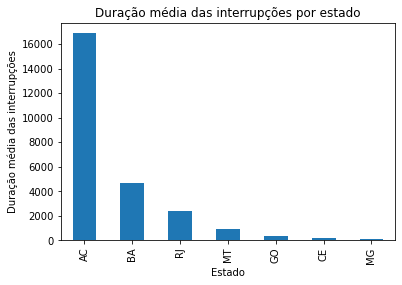

In [96]:
df_normalizado_empresas.groupby('Estado').mean()[
    'Duração média das interrupções'].sort_values(
    ascending=False)[:7].plot(kind='bar')

plt.title('Duração média das interrupções por estado')
plt.ylabel('Duração média das interrupções')
plt.xticks(rotation=90);

# Natureza jurídica

In [ ]:
def create_series_extravasamentos_natureza():
    extrav_nat = {}
    for nat3 in naturezas_unique:
        extrav_nat[nat3] = df_normalizado_empresas[
            df_normalizado2[nat3] == 1][
            'Extravasamentos de esgotos registrados a cada 1000 habitantes'].mean()
        
    extrav_nat_pd = pd.Series(extrav_nat)
    extrav_nat_pd.sort_values(ascending=False)
    
    return extrav_nat_pd
        
extrav_nat_pd = create_series_extravasamentos_natureza(

# Dados

In [71]:
df_operacionais_total = df_SNIS_pop[
    ['Município',
     'Estado',
    'QD011 - Quantidades de extravasamentos de esgotos registrados',
     'QD021 - Quantidade de interrupções sistemáticas',
     'QD023 - Quantidade de reclamações ou solicitações de serviços',
     'QD024 - Quantidade de serviços executados'    
    ]]

In [72]:
df_operacionais = df_normalizado_empresas.merge(
    df_operacionais_total, how='left', on=['Município', 'Estado'])

In [78]:
df_operacionais.columns

Index(['Município', 'Estado', 'Prestadores', 'Natureza Jurídica', 'Autarquia',
       'Administração pública direta',
       'Sociedade de economia mista com administração pública',
       'Empresa privada', 'Empresa pública', 'Organização social',
       'POPULAÇÃO ESTIMADA', 'sabesp', 'cedae', 'copasa', 'sanepar', 'corsan',
       'embasa', 'compesa', 'saneago', 'caesb', 'cagece', 'brk',
       'Reclamacoes a cada 1000 habitantes',
       'Extravasamentos de esgotos registrados a cada 1000 habitantes',
       'Quantidade de interrupções sistemáticas a cada 1000 habitantes',
       'Quantidade de serviços executados a cada 1000 habitantes',
       'QD011 - Quantidades de extravasamentos de esgotos registrados',
       'QD021 - Quantidade de interrupções sistemáticas',
       'QD023 - Quantidade de reclamações ou solicitações de serviços',
       'QD024 - Quantidade de serviços executados'],
      dtype='object')

In [80]:
df_operacionais = df_operacionais[['Município', 'Estado', 'Administração pública direta',
       'Sociedade de economia mista com administração pública',
       'Empresa privada', 'Empresa pública', 'Organização social',
       'POPULAÇÃO ESTIMADA', 'sabesp', 'cedae', 'copasa', 'sanepar', 'corsan',
       'embasa', 'compesa', 'saneago', 'caesb', 'cagece', 'brk',
       'Reclamacoes a cada 1000 habitantes',
       'Extravasamentos de esgotos registrados a cada 1000 habitantes',
       'Quantidade de interrupções sistemáticas a cada 1000 habitantes',
       'Quantidade de serviços executados a cada 1000 habitantes',
       'QD011 - Quantidades de extravasamentos de esgotos registrados',
       'QD021 - Quantidade de interrupções sistemáticas',
       'QD023 - Quantidade de reclamações ou solicitações de serviços',
       'QD024 - Quantidade de serviços executados']]

In [97]:
df_operacionais.to_csv('dados_operacionais_indicadores_virgula.csv', index=False, decimal=',')

In [85]:
df_operacionais.shape

(4249, 27)

In [86]:
df_x = pd.read_csv('dados_operacionais_indicadores.csv')
df_x.shape

(4249, 27)

In [88]:
brk_operacionais = df_operacionais[df_operacionais['brk'] == 1]

In [90]:
brk_operacionais

,Município,Estado,Administração pública direta,Sociedade de economia mista com administração pública,Empresa privada,Empresa pública,Organização social,POPULAÇÃO ESTIMADA,sabesp,cedae,...,cagece,brk,Reclamacoes a cada 1000 habitantes,Extravasamentos de esgotos registrados a cada 1000 habitantes,Quantidade de interrupções sistemáticas a cada 1000 habitantes,Quantidade de serviços executados a cada 1000 habitantes,QD011 - Quantidades de extravasamentos de esgotos registrados,QD021 - Quantidade de interrupções sistemáticas,QD023 - Quantidade de reclamações ou solicitações de serviços,QD024 - Quantidade de serviços executados
632,Cachoeiro de Itapemirim,ES,1,0,1,0,0,208972.0,0,0,...,0,1,104.411117,0.011973,NaN,58.802136,2.502,NaN,21819.0,12288.0
996,Paço do Lumiar,MA,0,0,1,0,0,122197.0,0,0,...,0,1,175.478940,5.916676,0.294606,142.458489,723.000,36.0,21443.0,17408.0
1034,São José de Ribamar,MA,0,0,1,0,0,177687.0,0,0,...,0,1,253.862128,3.162865,0.163208,210.381176,562.000,29.0,45108.0,37382.0
1911,Bom Jesus do Tocantins,PA,0,0,1,0,0,16981.0,0,0,...,0,1,224.780637,NaN,0.176668,175.784701,NaN,3.0,3817.0,2985.0
1928,Redenção,PA,1,0,1,0,0,84787.0,0,0,...,0,1,358.474766,NaN,0.436388,193.178199,NaN,37.0,30394.0,16379.0
1934,Santana do Araguaia,PA,1,0,1,0,0,72817.0,0,0,...,0,1,101.157697,NaN,NaN,74.900092,NaN,NaN,7366.0,5454.0
1937,São Domingos do Araguaia,PA,1,0,1,0,0,25557.0,0,0,...,0,1,436.436201,NaN,0.234769,318.268967,NaN,6.0,11154.0,8134.0
1939,São João do Araguaia,PA,0,0,1,0,0,13996.0,0,0,...,0,1,186.053158,NaN,1.000286,117.104887,NaN,14.0,2604.0,1639.0
2789,Macaé,RJ,1,1,1,0,0,256672.0,0,1,...,0,1,77.359431,NaN,1.024654,66.937570,NaN,263.0,19856.0,17181.0
2817,Rio das Ostras,RJ,0,1,1,0,0,150674.0,0,1,...,0,1,118.567238,0.046458,4.148028,86.026786,7.000,625.0,17865.0,12962.0


In [89]:
df_operacionais.to_csv('dados_operacionais_brk.csv', index=False)